In [28]:
# imports
import pandas as pd
import numpy as np
import yfinance as yf
from finta import TA
import hvplot.pandas
import plotly.graph_objects as go
import panel as pn
from panel.interact import interact
from panel import widgets
import yfinance as yf

In [46]:
#activating panel extension in Jupyter Lab
pn.extension()

In [47]:
#initialize hvplot.pandas after pn.extension
import hvplot.pandas

In [48]:
# testing BTC-AUD
BTC_df = yf.download(tickers = "SPY", period = "15y")

[*********************100%***********************]  1 of 1 completed


In [49]:
# Setting up Bollinger band
BTC_bb = TA.BBANDS(BTC_df,period=50,std_multiplier=3)
BTC_bb = BTC_bb.dropna()

# Joining the two dataframes
BTC_ndf = BTC_df.join(BTC_bb)
BTC_ndf = BTC_ndf.dropna()

# create sell price
BTC_ndf["Sell"] = BTC_ndf["BB_LOWER"] * 1.05

BTC_ndf = BTC_ndf.drop(columns = ["Adj Close", "Volume","BB_MIDDLE"])
BTC_ndf.head()

,Open,High,Low,Close,BB_UPPER,BB_LOWER,Sell
Date,,,,,,,
2007-08-13,146.500000,146.889999,145.020004,145.229996,159.944777,141.444824,148.517066
2007-08-14,145.699997,146.059998,142.720001,143.009995,160.159463,140.786538,147.825865
2007-08-15,142.720001,144.460007,140.619995,141.039993,160.612931,139.835070,146.826823
2007-08-16,139.789993,142.940002,137.000000,142.100006,160.948177,139.110224,146.065735
2007-08-17,145.500000,145.809998,141.389999,144.710007,161.085524,138.797277,145.737141


<AxesSubplot:xlabel='Date'>

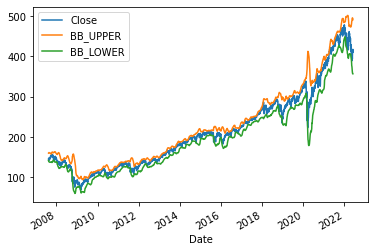

In [50]:
aa = BTC_ndf[['Close','BB_UPPER','BB_LOWER']].plot()
aa

In [51]:
# Set the Signal column
BTC_ndf["Signal"] = 0.0
BTC_ndf["Buy price"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
for index, row in BTC_ndf.iterrows():
    if (row["Close"] < row["BB_LOWER"]) and row["Signal"]==0:
        signal=1
        BTC_ndf.loc[index, "Signal"] = 1.0
        # BTC_ndf.loc[index, "Buy price"] = row["Close"]
    if (row["Close"] > row["BB_LOWER"]) and row["Signal"]==1.0:
        signal=0
        BTC_ndf.loc[index, "Signal"] = 0
    if (row["Close"] >= row["BB_UPPER"]): # and row["Signal"] ==1.0:
        signal=0

  
        
    # BTC_ndf.loc[index,"Signal"] = signal

In [52]:
BTC_ndf

,Open,High,Low,Close,BB_UPPER,BB_LOWER,Sell,Signal,Buy price
Date,,,,,,,,,
2007-08-13,146.500000,146.889999,145.020004,145.229996,159.944777,141.444824,148.517066,0.0,0.0
2007-08-14,145.699997,146.059998,142.720001,143.009995,160.159463,140.786538,147.825865,0.0,0.0
2007-08-15,142.720001,144.460007,140.619995,141.039993,160.612931,139.835070,146.826823,0.0,0.0
2007-08-16,139.789993,142.940002,137.000000,142.100006,160.948177,139.110224,146.065735,0.0,0.0
2007-08-17,145.500000,145.809998,141.389999,144.710007,161.085524,138.797277,145.737141,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-05-27,407.910004,415.380005,407.700012,415.260010,495.081772,357.996630,375.896461,0.0,0.0
2022-05-31,413.549988,416.459991,410.029999,412.929993,494.237872,357.576930,375.455777,0.0,0.0
2022-06-01,415.170013,416.239990,406.929993,409.589996,493.407917,357.014884,374.865629,0.0,0.0


In [53]:
BTC_ndf['Buy_Signal']=(BTC_ndf['BB_LOWER']>BTC_ndf['Close']).astype(int)

In [54]:
BTC_ndf['Sell_Signal']=-(BTC_ndf['Close']>BTC_ndf['Sell']).astype(int)

In [55]:
BTC_ndf['Signals']=BTC_ndf['Buy_Signal']+BTC_ndf['Sell_Signal']

In [56]:
BTC_ndf

,Open,High,Low,Close,BB_UPPER,BB_LOWER,Sell,Signal,Buy price,Buy_Signal,Sell_Signal,Signals
Date,,,,,,,,,,,,
2007-08-13,146.500000,146.889999,145.020004,145.229996,159.944777,141.444824,148.517066,0.0,0.0,0,0,0
2007-08-14,145.699997,146.059998,142.720001,143.009995,160.159463,140.786538,147.825865,0.0,0.0,0,0,0
2007-08-15,142.720001,144.460007,140.619995,141.039993,160.612931,139.835070,146.826823,0.0,0.0,0,0,0
2007-08-16,139.789993,142.940002,137.000000,142.100006,160.948177,139.110224,146.065735,0.0,0.0,0,0,0
2007-08-17,145.500000,145.809998,141.389999,144.710007,161.085524,138.797277,145.737141,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,407.910004,415.380005,407.700012,415.260010,495.081772,357.996630,375.896461,0.0,0.0,0,-1,-1
2022-05-31,413.549988,416.459991,410.029999,412.929993,494.237872,357.576930,375.455777,0.0,0.0,0,-1,-1
2022-06-01,415.170013,416.239990,406.929993,409.589996,493.407917,357.014884,374.865629,0.0,0.0,0,-1,-1


In [57]:
inpos=0
prev_close=146.500000
pnls=[]
trade_size=1
for index, row in BTC_ndf.iterrows():
    close=row['Close']
    bblower=row['BB_LOWER']
    
    if close<bblower:
        inpos=1
        
    elif close>row["BB_UPPER"]:
        inpos=0
    pnl=(close-prev_close)*inpos*trade_size
    pnls.append(pnl)
    print('Current price ', close, 'Current position ', inpos, 'Daily PNL ',pnl)
    prev_close=close

Current price  145.22999572753906 Current position  0 Daily PNL  -0.0
Current price  143.00999450683594 Current position  0 Daily PNL  -0.0
Current price  141.0399932861328 Current position  0 Daily PNL  -0.0
Current price  142.10000610351562 Current position  0 Daily PNL  0.0
Current price  144.7100067138672 Current position  0 Daily PNL  0.0
Current price  144.63999938964844 Current position  0 Daily PNL  -0.0
Current price  144.92999267578125 Current position  0 Daily PNL  0.0
Current price  146.64999389648438 Current position  0 Daily PNL  0.0
Current price  146.52000427246094 Current position  0 Daily PNL  -0.0
Current price  148.3300018310547 Current position  0 Daily PNL  0.0
Current price  146.9499969482422 Current position  0 Daily PNL  -0.0
Current price  143.72000122070312 Current position  0 Daily PNL  -0.0
Current price  146.5399932861328 Current position  0 Daily PNL  0.0
Current price  146.14999389648438 Current position  0 Daily PNL  -0.0
Current price  147.589996337890

<AxesSubplot:xlabel='Date'>

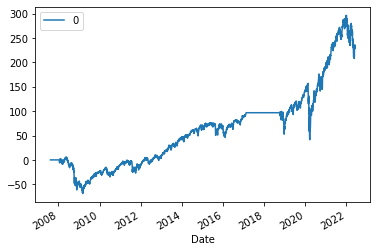

In [58]:
bb = np.cumsum(pd.DataFrame(pnls,index=BTC_ndf.index)).plot()
bb

In [59]:
BTC_ndf.head()

,Open,High,Low,Close,BB_UPPER,BB_LOWER,Sell,Signal,Buy price,Buy_Signal,Sell_Signal,Signals
Date,,,,,,,,,,,,
2007-08-13,146.500000,146.889999,145.020004,145.229996,159.944777,141.444824,148.517066,0.0,0.0,0,0,0
2007-08-14,145.699997,146.059998,142.720001,143.009995,160.159463,140.786538,147.825865,0.0,0.0,0,0,0
2007-08-15,142.720001,144.460007,140.619995,141.039993,160.612931,139.835070,146.826823,0.0,0.0,0,0,0
2007-08-16,139.789993,142.940002,137.000000,142.100006,160.948177,139.110224,146.065735,0.0,0.0,0,0,0
2007-08-17,145.500000,145.809998,141.389999,144.710007,161.085524,138.797277,145.737141,0.0,0.0,0,0,0


In [60]:
# Initialize the trade evaluation DataFrame
trade_evaluation_df = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)


# Initialize the iterative variables
entry_date = ""
exit_date = ""
entry_portfolio_holding = 0.0
exit_portfolio_holding = 0.0
share_size = 0
entry_share_price = 0.0
exit_share_price = 0.0

# Loop through the signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in BTC_ndf.iterrows():
    if row['Signals'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Entry/Exit Position']
        entry_share_price = row['Close']

    elif row['Signals'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df = trade_evaluation_df.append(
            {
                'Currency': 'AUD/JPY',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Review the DataFrame
trade_evaluation_df

KeyError: 'Entry/Exit Position'